## **Airbnb Market Analysis and Price Prediction Project**

This project analyzes New York City Airbnb data from Inside Airbnb to uncover key market patterns and predict listing prices using machine learning. By examining trends in reviews, availability, and listing features, the goal is to identify what drives value, optimize pricing strategies, and spotlight characteristics of high-performing rentals. Ultimately, the analysis aims to provide actionable recommendations that hosts and Airbnb can use to increase profitability and improve the guest experience.

#### **Setup and Data Loading**

In [61]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import langid

In [62]:
#loading dataphrames
calendar=pd.read_csv('/Users/zoewalp/Desktop/DAProjects/airbnb_nyc/airbnb/nyc_calendar.csv')
reviews=pd.read_csv('/Users/zoewalp/Desktop/DAProjects/airbnb_nyc/airbnb/nyc_reviews.csv')
listings=pd.read_csv('/Users/zoewalp/Desktop/DAProjects/airbnb_nyc/airbnb/nyc_listings.csv')

#### **Exploring the Listings Dataset**

In [63]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [64]:
#dropping unnessary columns in listings dataframe
cols_to_drop = [
    'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
    'description', 'neighborhood_overview', 'picture_url', 'host_url',
    'host_name', 'host_since', 'host_location', 'host_about',
    'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
    'host_total_listings_count', 'host_verifications', 'host_has_profile_pic',
    'host_identity_verified', 'neighbourhood', 'bathrooms_text',
    'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights',
    'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
    'calendar_updated', 'calendar_last_scraped', 'number_of_reviews_ltm',
    'number_of_reviews_l30d', 'availability_eoy', 'number_of_reviews_ly',
    'estimated_occupancy_l365d', 'estimated_revenue_l365d', 'first_review',
    'last_review', 'license', 'calculated_host_listings_count',
    'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms'
]
# Drop columns if they exist in the DataFrame to avoid errors
cols_to_drop_existing = [col for col in cols_to_drop if col in listings.columns]

listings_cleaned = listings.drop(columns=cols_to_drop_existing)

# Check remaining columns
print(listings_cleaned.columns)

Index(['id', 'host_id', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month'],
      dtype='object')


In [65]:
listings_cleaned.head()

,id,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,2539,2787,within an hour,100%,80%,f,5.0,Kensington,Brooklyn,40.64529,...,9,4.89,4.88,5.00,5.00,5.0,4.75,4.88,f,0.08
1,2595,2845,within a day,61%,21%,f,7.0,Midtown,Manhattan,40.75356,...,49,4.68,4.73,4.63,4.77,4.8,4.81,4.40,f,0.26
2,5136,7378,NaN,NaN,100%,f,1.0,Sunset Park,Brooklyn,40.66265,...,4,4.75,4.75,4.50,5.00,5.0,4.75,4.75,t,0.03
3,6848,15991,within an hour,100%,100%,t,1.0,Williamsburg,Brooklyn,40.70935,...,195,4.58,4.59,4.85,4.85,4.8,4.69,4.58,f,1.00
4,6872,16104,within a few hours,100%,33%,f,2.0,East Harlem,Manhattan,40.80107,...,1,5.00,5.00,5.00,5.00,5.0,5.00,5.00,f,0.03


In [66]:
#cleaning price column
listings_cleaned['price']=listings_cleaned['price'].replace('[\$,]','', regex=True).astype(float)

In [67]:
#renaming items in columns
listings_cleaned['host_is_superhost'] = listings_cleaned['host_is_superhost'].map({'t': True, 'f': False})
listings_cleaned['instant_bookable'] = listings_cleaned['instant_bookable'].map({'t': True, 'f': False})


In [68]:
#Calculate missing values and perenctages
null_counts = listings_cleaned.isnull().sum().sort_values(ascending=False)
null_percentage = (listings_cleaned.isnull().mean() * 100).sort_values(ascending=False)

#Combine into one summary DataFrame
null_summary = pd.DataFrame({
    'Missing_Values': null_counts,
    'Missing_%': null_percentage.round(2),
    'Data_Type': listings_cleaned.dtypes
})

print(null_summary[null_summary['Missing_Values'] > 0])


                             Missing_Values  Missing_% Data_Type
bathrooms                             14971      40.44   float64
bedrooms                               6172      16.67   float64
beds                                  15095      40.78   float64
has_availability                       5637      15.23    object
host_acceptance_rate                  14645      39.56    object
host_is_superhost                       405       1.09    object
host_listings_count                      25       0.07   float64
host_response_rate                    15393      41.58    object
host_response_time                    15393      41.58    object
price                                 15185      41.02   float64
review_scores_accuracy                11670      31.53   float64
review_scores_checkin                 11674      31.54   float64
review_scores_cleanliness             11661      31.50   float64
review_scores_communication           11666      31.51   float64
review_scores_location   

In [69]:
listings_cleaned=listings_cleaned[listings_cleaned['price'].notnull()]
#saving as CSV in current working directory
#listings_cleaned.to_csv('listings_cleaned.csv',index=False)

#### **Exploring the Reviews Dataset**

In [70]:
#Inspecting columnms 
print(reviews.columns)

#Creating copy to preserve original
reviews_cleaned = reviews.copy()

# Drop unnessecary columns
columns_to_drop = ['id', 'reviewer_name']
reviews_cleaned = reviews.drop(columns=columns_to_drop)

# Ensuring 'comments' is string type
reviews_cleaned['comments'] = reviews_cleaned['comments'].astype(str)


# Add quotes around the entire 'comments' text
reviews_cleaned['comments'] = '"' + reviews_cleaned['comments'] + '"'

#Truncate to first 100 characters
reviews_cleaned['comments'] = reviews_cleaned['comments'].astype(str).str.slice(0, 100)


Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')


In [71]:
#Check for missing listing IDs
reviews_cleaned['listing_id'].isnull().sum()

0

In [72]:
#finding columns that are nonn english
def is_english(text):
    text = text[:300]
    try:
        text.encode('ascii')
    except UnicodeEncodeError:
        return False
    else:
        return True

#Drop nulls and ensurue comments are strings
comments = reviews_cleaned['comments'].dropna().astype(str)
#Apply heuristic to each comment
english_mask = comments.apply(is_english)

#Count non-english rows
non_english_count = (~english_mask).sum()
print(f"Non-English rows (heuristic): {non_english_count}")


Non-English rows (heuristic): 196786


In [73]:
#Filter out non-English rows form reviews_cleaned
original_row_count = reviews_cleaned.shape[0]
filtered_reviews = reviews_cleaned[english_mask].copy()

# Count rows after filtering
filtered_row_count = filtered_reviews.shape[0]

#Display change in row count
print(f"Rows before filtering: {original_row_count}")
print(f"Rows after filtering: {filtered_row_count}")
print(f"Number of rows dropped: {original_row_count - filtered_row_count}")
print(english_mask.value_counts())



Rows before filtering: 971379
Rows after filtering: 774593
Number of rows dropped: 196786
comments
True     774593
False    196786
Name: count, dtype: int64


In [74]:
# Filter reviews_cleaned using original boolean mask (no reset needed)
reviews_cleaned_filtered = reviews_cleaned[english_mask].copy()
#Reset index on filtered DataFrame for clean indexing
reviews_cleaned_filtered = reviews_cleaned_filtered.reset_index(drop=True)



In [75]:
# Verify index alignment between reviews DataFrame and English language mask

print("reviews_cleaned index sample:", reviews_cleaned.index[:10])
print("english_mask index sample:", english_mask.index[:10].tolist())
print("Are indices equal? ", reviews_cleaned.index.equals(english_mask.index))


reviews_cleaned index sample: RangeIndex(start=0, stop=10, step=1)
english_mask index sample: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Are indices equal?  True


In [76]:
#Ensure each comment ends with closing quote (and if missing)
def add_quote_if_missing(text):
    text = str(text).rstrip()
    if not text.endswith('"'):
        return text + '"'
    return text

reviews_cleaned['comments'] = reviews_cleaned['comments'].apply(add_quote_if_missing)


In [77]:
#Clean and properly formate comments fro CSV export or similar
def clean_comment(text):
    if pd.isnull(text):
        return ""
    text = str(text).strip()
    #Escape internal quotes by doubling them 
    text = text.replace('"', '""')
    # Wrap in quotes only if not already
    if not (text.startswith('"') and text.endswith('"')):
        text = f'"{text}"'
    return text

reviews_cleaned['comments']=reviews_cleaned['comments'].apply(clean_comment)

#Helper function to detect rows with unmatched quotes
def has_unmatched_quote(s):
    s=str(s)
    return s.count('"')%2 !=0

#Filter and count rows with unmatched quotes after cleaning
unmatched = reviews_cleaned[reviews_cleaned['comments'].apply(has_unmatched_quote)]
print(f"Rows with unmatched quotes: {unmatched.shape[0]}")

Rows with unmatched quotes: 0


In [78]:
#Escape all internal quotes in comments by doubling them for CSV compatibility
reviews_cleaned['comments'] = reviews_cleaned['comments'].astype(str).str.replace('"', '""')

#Clean comments by removing line breaks and excaping internal quotes for safe CSV export
reviews_cleaned['comments'] = (
    reviews_cleaned['comments']
    .astype(str)
    .str.replace(r'[\r\n]+', ' ', regex=True)  # Replace line breaks with space
    .str.replace('"', '""')                    # Escape double quotes inside text
)

#Convert 'date' column to datetime, coercing errors to NaT
reviews_cleaned['date']=pd.to_datetime(reviews_cleaned['date'],errors='coerce')

#Strippoing leading/trailing whitespace from comments
reviews_cleaned['comments'] = reviews_cleaned['comments'].str.strip()

#Removing excessive wrapping quotes from comments
reviews_cleaned['comments'] = reviews_cleaned['comments'].astype(str).str.strip('"')



In [79]:
#Create csv copy
'''import csv
reviews_cleaned.to_csv("reviews_cleaned.csv",
                  index=False,
                  quoting=csv.QUOTE_ALL,
                  escapechar='\\',
                  lineterminator='\n')'''

'import csv\nreviews_cleaned.to_csv("reviews_cleaned.csv",\n                  index=False,\n                  quoting=csv.QUOTE_ALL,\n                  escapechar=\'\\\',\n                  lineterminator=\'\n\')'

#### **Exploring the Calendar Dataset**

In [80]:
# Inspect calendar DataFrame basic info and structure
print("Calendar shape:", calendar.shape)
print("\nCalendar info:")
calendar.info()
print("\nCalendar columns:", calendar.columns.tolist())
print("\nCalendar data types:")
print(calendar.dtypes)

Calendar shape: (999999, 7)

Calendar info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   listing_id      999999 non-null  int64  
 1   date            999999 non-null  object 
 2   available       999999 non-null  object 
 3   price           999999 non-null  object 
 4   adjusted_price  0 non-null       float64
 5   minimum_nights  999636 non-null  float64
 6   maximum_nights  999636 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 53.4+ MB

Calendar columns: ['listing_id', 'date', 'available', 'price', 'adjusted_price', 'minimum_nights', 'maximum_nights']

Calendar data types:
listing_id          int64
date               object
available          object
price              object
adjusted_price    float64
minimum_nights    float64
maximum_nights    float64
dtype: object


In [81]:
# Preview the first 5 rows of the calendar dataset
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2539,2025-05-02,f,$299.00,NaN,30.0,730.0
1,2539,2025-05-03,f,$299.00,NaN,30.0,730.0
2,2539,2025-05-04,f,$299.00,NaN,30.0,730.0
3,2539,2025-05-05,f,$299.00,NaN,30.0,730.0
4,2539,2025-05-06,f,$299.00,NaN,30.0,730.0


In [82]:
#Create a copy of calendar DataFrame to preserve original
calendar_cleaned = calendar.copy()

#Drop the 'adjusted_price' column
calendar_cleaned=calendar_cleaned.drop(columns=['adjusted_price'])

#Convert 'date' column to datetime, coercing errors
calendar_cleaned['date']=pd.to_datetime(calendar_cleaned['date'],errors='coerce')

In [83]:
#Save cleaned calendar DataFrame to CSV(without row indices)
#calendar_cleaned.to_csv('calendar_cleaned.csv',index=False)

#### **Merging Datasets**

In [84]:
#Merging listings and calendar data to combine listing details with availability and pricing
df1_merged = listings_cleaned.merge(calendar_cleaned, left_on='id', right_on='listing_id',how='inner')


In [85]:
#Aggregate revierws to count number of comments per listing
review_summary = reviews_cleaned.groupby('listing_id').agg({'comments':'count'}).reset_index().rename(columns={'comments': 'review_count'})
review_summary.head()

,listing_id,review_count
0,2539,9
1,2595,49
2,5136,4
3,6848,195
4,6872,1


In [86]:
#joining review summary and df1_merged
df2_merged=df1_merged.merge(review_summary,left_on='id', right_on= 'listing_id', how='left')
df2_merged.head()

,id,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,...,instant_bookable,reviews_per_month,listing_id_x,date,available,price_y,minimum_nights_y,maximum_nights_y,listing_id_y,review_count
0,2595,2845,within a day,61%,21%,False,7.0,Midtown,Manhattan,40.75356,...,False,0.26,2595,2025-05-02,t,$225.00,30.0,1125.0,2595.0,49.0
1,2595,2845,within a day,61%,21%,False,7.0,Midtown,Manhattan,40.75356,...,False,0.26,2595,2025-05-03,t,$225.00,30.0,1125.0,2595.0,49.0
2,2595,2845,within a day,61%,21%,False,7.0,Midtown,Manhattan,40.75356,...,False,0.26,2595,2025-05-04,t,$225.00,30.0,1125.0,2595.0,49.0
3,2595,2845,within a day,61%,21%,False,7.0,Midtown,Manhattan,40.75356,...,False,0.26,2595,2025-05-05,t,$225.00,30.0,1125.0,2595.0,49.0
4,2595,2845,within a day,61%,21%,False,7.0,Midtown,Manhattan,40.75356,...,False,0.26,2595,2025-05-06,t,$225.00,30.0,1125.0,2595.0,49.0


In [87]:
#Fill mising reveiw counts with 0 and convert to integer
df2_merged['review_count']=df2_merged['review_count'].fillna(0).astype(int)

#Check if listing_id columns from merge are identical in all rows
matches = (df2_merged['listing_id_x'] == df2_merged['listing_id_y']).all()
print("Do listing_id_x and listing_id_y match everywhere?", matches)

#Extract rows where listing IDs don't match
mismatches = df2_merged[df2_merged['listing_id_x'] != df2_merged['listing_id_y']]
print("Mismatched rows count:", len(mismatches))

#Show random sample of mismatched listing IDs for review
samplesize=min(5,len(mismatches))
print(mismatches[['listing_id_x', 'listing_id_y']].sample(samplesize))

Do listing_id_x and listing_id_y match everywhere? False
Mismatched rows count: 9490
        listing_id_x  listing_id_y
8120           54466           NaN
97602         400078           NaN
289997       2657331           NaN
191696       1166947           NaN
437445       5661631           NaN


In [88]:

#Rename lsiting_id_x to listing_id
df2_merged.rename(columns={'listing_id_x':'listing_id'}, inplace=True)

#### Visualizations

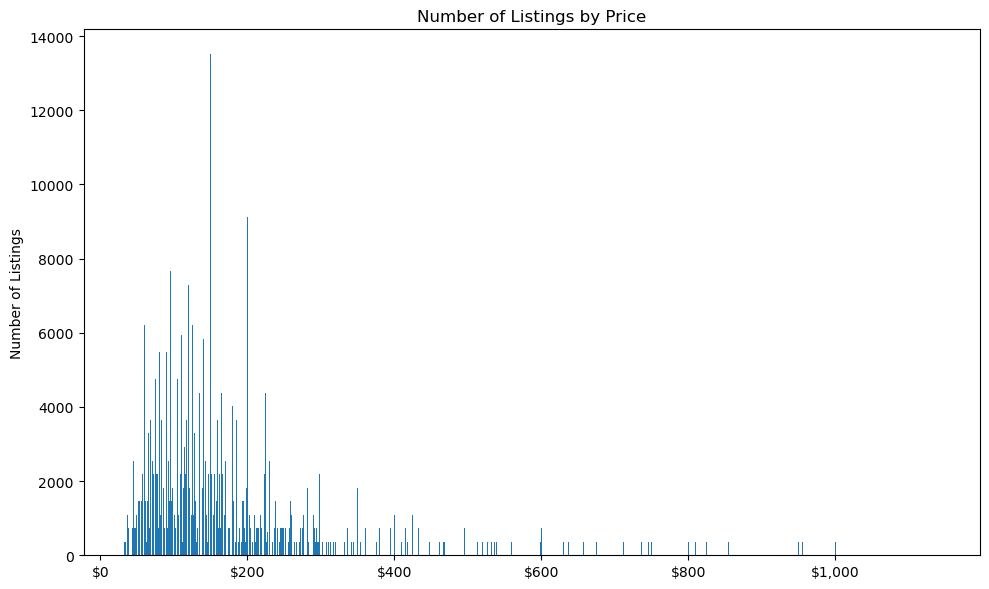

In [89]:
df_filtered = df2_merged[df2_merged['price_x'] < 1200]
#Group by price and count how many listings for each price
price_counts = df_filtered.groupby('price_x').size().reset_index(name='listing_count')
price_counts = price_counts.sort_values('price_x')

# Plot basic bar chart (may be dense if too many price points)
plt.figure(figsize=(10, 6))
plt.bar(price_counts['price_x'], price_counts['listing_count'])
plt.xlabel('')
ax=plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.ylabel('Number of Listings')
plt.title('Number of Listings by Price')
plt.tight_layout()
plt.show()

**What this means?**

Most Listings Are Moderately Priced:
- There's a significan number of listings within the $100-$150 price range. This suggests a central pricing norm, likely representing 'standard' or most competitive rate for Airbnb properties in the market.

Sharp Decline After $200
- Listings sharply deciline after the $200 mark, indicating fewer high-end or luxury rentals. This long tail suggets that while high-price listings exist, they are less common.

Possible Price Anchors
- Several spikes (e.g. $100, $150, $200) may indicate pricing anchors or platform-recommended round numbers that hosts tend to adopt. 

Implications
- **Market Entry**: New hosts aiming for visibility may benefit from pricing within the $100-$150 sweet spot.
- **Revenue Strategy**: For investors, maximizing occupancy at mid-range prices may be more lucrative than targeting niche luxury segments



In [90]:
#importing Wordcloud
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS


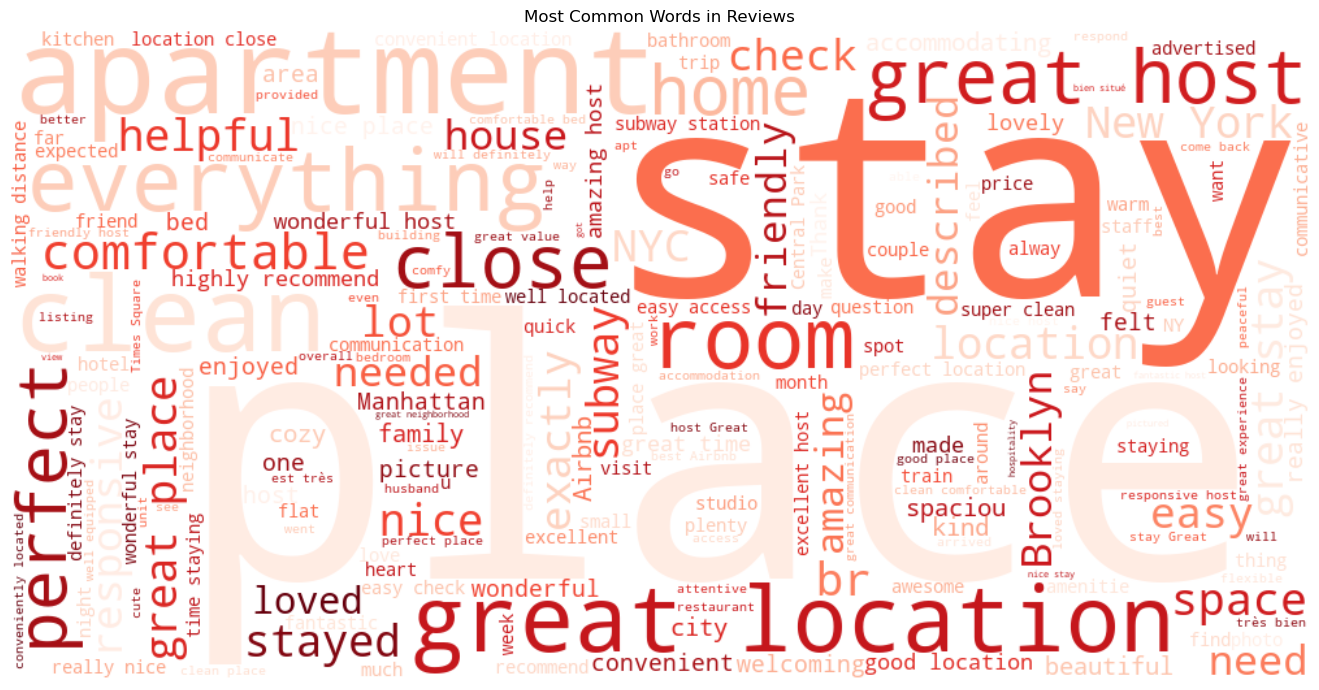

In [91]:
#Combione all comments into one string
all_text=''.join(reviews_cleaned['comments'].dropna())

stopwords=set(STOPWORDS)
stopwords.update('Airbnb','place','stay','host')

#Gerate word cloud 
wordcloud = WordCloud(width=1000, height=500, background_color='white',
                      stopwords=stopwords, colormap='Reds').generate(all_text)
#Ploy
plt.figure(figsize=(14,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews')
plt.tight_layout()
plt.show()


These phrases are what guests point out most often in reviews

In [92]:
!pip install textblob
from textblob import TextBlob

In [101]:
#Calculate sentiment polarity
reviews_cleaned['sentiment']=reviews_cleaned['comments'].apply(lambda x:TextBlob(x).sentiment.polarity)

def label_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

reviews_cleaned['sentiment_label'] = reviews_cleaned['sentiment'].apply(label_sentiment)


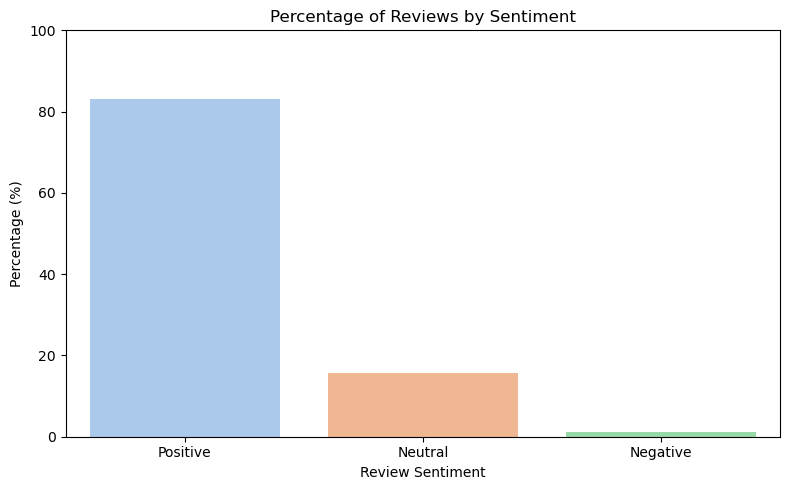

In [96]:
#Count labels
sentiment_counts = reviews_cleaned['sentiment_label'].value_counts(normalize=True).reset_index()
sentiment_counts.columns=['Sentiment','Percentage']
sentiment_counts['Percentage']*=100

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=sentiment_counts, x='Sentiment', y='Percentage', palette='pastel')
plt.title('Percentage of Reviews by Sentiment')
plt.ylabel('Percentage (%)')
plt.xlabel('Review Sentiment')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()



In [103]:
reviews_cleaned.head()

,listing_id,date,reviewer_id,comments,sentiment,sentiment_label
0,2539,2015-12-04,25160947,Great host,0.800000,Positive
1,2539,2016-08-27,91513326,Nice room for the price. Great neighborhood. J...,0.533333,Positive
2,2539,2016-10-01,90022459,Very nice apt. New remodeled.,0.505455,Positive
3,2539,2017-02-20,116165195,Great place to stay for a while. John is a gre...,0.650000,Positive
4,2539,2017-03-19,118432644,.,0.000000,Neutral


This is a visual breakdown; we see that reviewers overall are pleased with their airbnb experience

#### Training Data Setup

In [106]:
#Drop 'price_y' and create target variable 'y'
df2_merged = df2_merged.drop(columns=['price_y'], errors='ignore')
y = df2_merged['price_x']   

# Create feature set X for training by dropping target and irrelevant columns
X = df2_merged.drop(columns=[
    'price_x',         # drop target
    'price_y',         # drop if still present
    'listing_id',
    'id',
    'host_id',
    'host_name',
    'name',
    'description',
    'amenities',
    'date',
    'available'
], errors='ignore')


In [107]:
#Deal with nulls by filling missing values with 0
X=X.fillna(0)

In [108]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [109]:
#Drop target & ID/text fields not useful for modeling
X = df2_merged.drop(columns=[
    'price_x', 'price_y', 'listing_id', 'id', 'host_id', 'name', 'description', 'amenities', 'date', 'available'
], errors='ignore')

#Encode categorical variables using one-hot encoding (drop_first to avoid dummy variable trap)
cat_cols = X.select_dtypes(include='object').columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

#Handle missing values by filling with 0
X = X.fillna(0)

#Create target variable
y = df2_merged['price_x']  # or 'price_y'

#Split data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [110]:
#Fitting linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", r2_score(y_test, y_pred))


RMSE: 131.6677655419625
R² Score: 0.566693099189655


/Users/zoewalp/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### **What does this mean?** 

- On average the model's predictions are off by about $131.67 from actual price
- A score of .567 means that the model captures a moderate amount of price variability which is not bad for first pass

In [111]:
# Checking feature importance based on absolute coefficient values
coefficients = pd.Series(model.coef_, index=X.columns)
print(coefficients.sort_values(key=abs, ascending=False).head(10))

number_of_reviews                            -1.323801e+07
review_count                                  1.323801e+07
latitude                                     -3.715948e+03
longitude                                    -2.809240e+03
neighbourhood_group_cleansed_Staten Island   -1.536519e+03
neighbourhood_cleansed_Roosevelt Island       1.140644e+03
neighbourhood_cleansed_Tottenville           -9.817532e+02
neighbourhood_group_cleansed_Brooklyn        -9.800594e+02
host_response_rate_93%                        9.355452e+02
host_response_rate_75%                        9.296647e+02
dtype: float64


In [112]:
#CatBoost Regression Model Setup
!pip install catboost
from catboost import CatBoostRegressor, Pool 

In [113]:
#Prepare data

X=listings_cleaned.drop(columns=['price'])
y=listings_cleaned['price']
y_log=np.log1p(y)

#List of categorical features 
categorical_features = ['host_response_time','host_is_superhost','neighbourhood_cleansed','neighbourhood_group_cleansed','property_type','room_type','amenities','has_availability',
                        'instant_bookable']
#Convert peercent strings to floats
def convert_percent_to_float(series,default='0%'):
    return(
        series.fillna(default)
        .astype(str)
        .str.strip()
        .str.rstrip('%')
        .replace('','0')
        .astype(float)/100)

X['host_response_rate']=convert_percent_to_float(X['host_response_rate'])
X['host_acceptance_rate']=convert_percent_to_float(X['host_acceptance_rate'])

#Fill in missing categorical values with 'missing' or convert to str
for col in categorical_features:
    X[col]=X[col].fillna('missing').astype(str)
    
#Split dataset
X_train,X_test,y_train,y_test=train_test_split(X,y_log,test_size=.2,random_state=42)

#Creating pool objects
train_pool=Pool(X_train,y_train,cat_features=categorical_features)
test_pool=Pool(X_test,y_test,cat_features=categorical_features)

#Initialize model
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=.05,
    depth=6,
    eval_metric='RMSE',
    random_seed=42,
    early_stopping_rounds=50,
    verbose=100)

#Train model
model.fit(train_pool,eval_set=test_pool)

#Predict on test set
y_pred_log=model.predict(test_pool)

#Convert predictoins back to original sclae
y_pred=np.expm1(y_pred_log)
y_test_original=np.expm1(y_test)

#Evaluate
rmse=mean_squared_error(y_test_original,y_pred,squared=False)
r2=r2_score(y_test_original,y_pred)

print(f"CatBoost RMSE price scale): {rmse:.2f}")
print(f"CatBoost R² Score: {r2:.3f}")


0:	learn: 0.7739999	test: 0.7882730	best: 0.7882730 (0)	total: 69.6ms	remaining: 1m 9s
100:	learn: 0.3948468	test: 0.3940246	best: 0.3940246 (100)	total: 1.17s	remaining: 10.4s
200:	learn: 0.3698420	test: 0.3735949	best: 0.3735949 (200)	total: 2.17s	remaining: 8.63s
300:	learn: 0.3552740	test: 0.3636672	best: 0.3636672 (300)	total: 3.1s	remaining: 7.2s
400:	learn: 0.3449889	test: 0.3584965	best: 0.3584964 (399)	total: 3.98s	remaining: 5.95s
500:	learn: 0.3365111	test: 0.3554112	best: 0.3554112 (500)	total: 4.85s	remaining: 4.83s
600:	learn: 0.3294865	test: 0.3528844	best: 0.3528844 (600)	total: 5.72s	remaining: 3.8s
700:	learn: 0.3237564	test: 0.3510699	best: 0.3510699 (700)	total: 6.59s	remaining: 2.81s
800:	learn: 0.3181661	test: 0.3497679	best: 0.3497679 (800)	total: 7.64s	remaining: 1.9s
900:	learn: 0.3130079	test: 0.3482924	best: 0.3482842 (899)	total: 8.61s	remaining: 946ms
999:	learn: 0.3082069	test: 0.3471676	best: 0.3471676 (999)	total: 9.5s	remaining: 0us

bestTest = 0.347167

/Users/zoewalp/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**What this means?** 

- CatBoost regression model successfully trained on Airbnb dataset
- On average it was $411 off when predicting prices
- Able to explain about 29% of differences in prices
- It works but there is room for improvement

#### **Prediction Visualizations**

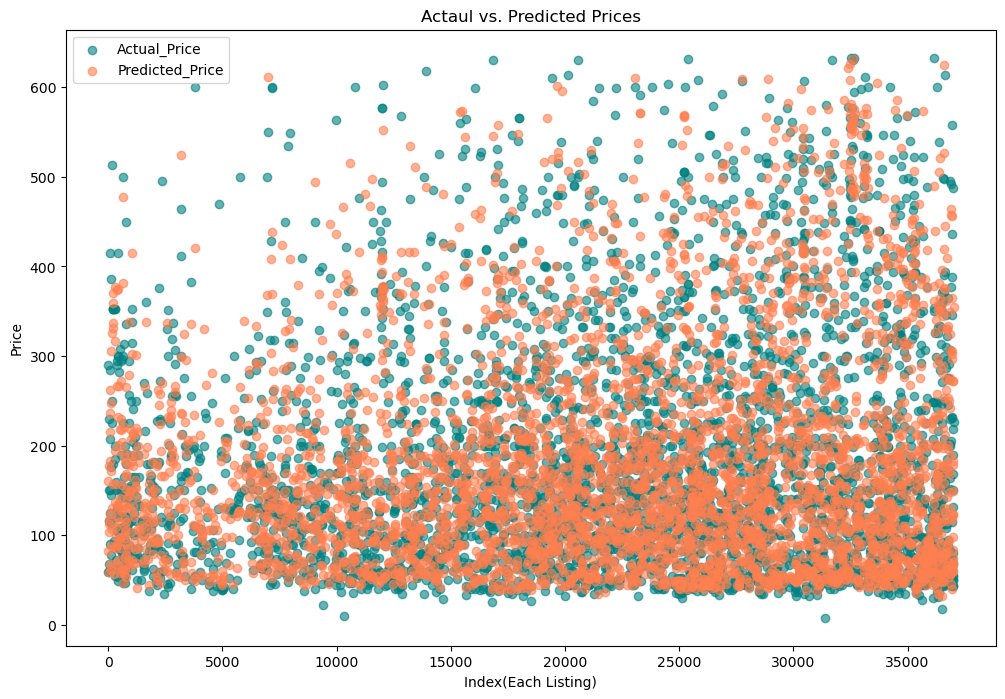

In [114]:
#Visualizing Actual vs. Predicted Prices

results_df = pd.DataFrame({'Actual':y_test_original,'Predicted':y_pred})

#Filter out outliers (top 5% by Actual price))
upper_limit=results_df['Actual'].quantile(.95)
#Reset index for clean plotting
results_df=results_df[(results_df['Actual'] <= upper_limit) & (results_df['Predicted'] <= upper_limit)]

plt.figure(figsize=(12,8))
plt.scatter(results_df.index,results_df['Actual'],color='teal',alpha=.6, label='Actual_Price')
plt.scatter(results_df.index,results_df['Predicted'],color='coral',alpha=.6, label='Predicted_Price')
plt.xlabel("Index(Each Listing)")
plt.ylabel("Price")
plt.title("Actaul vs. Predicted Prices")
plt.legend()
plt.grid(False)
plt.show()

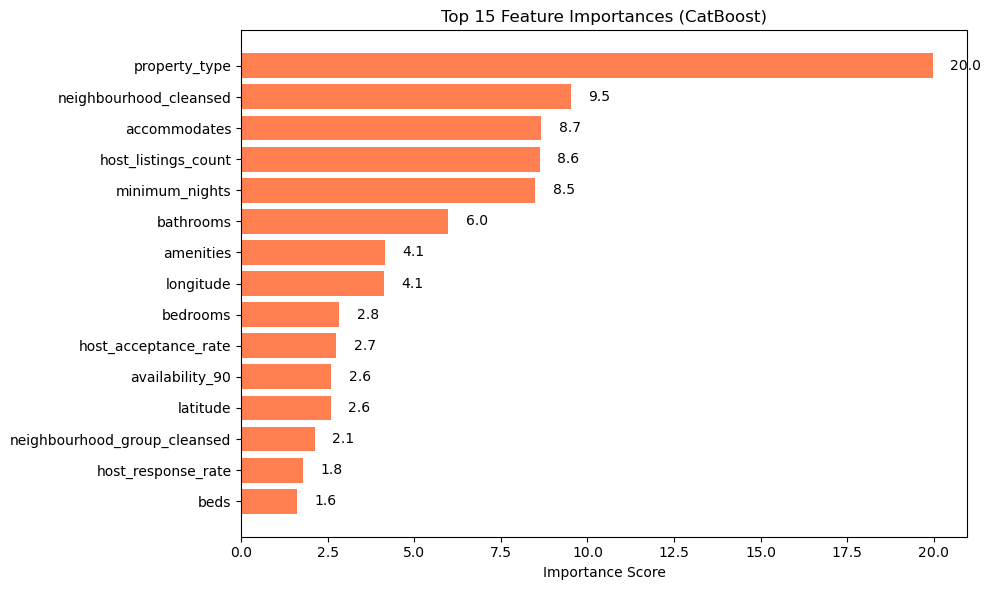

In [115]:
# Get importance scores
importances = model.get_feature_importance(train_pool)
features = X_train.columns

# Create DataFrame
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Select top 15 features
top_feats = feat_df.head(15).sort_values(by='Importance')

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_feats['Feature'], top_feats['Importance'], color='coral')
for i, v in enumerate(top_feats['Importance']):
    plt.text(v + 0.5, i, f"{v:.1f}", va='center')
plt.title("Top 15 Feature Importances (CatBoost)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


This graph shows which features (numerical and categorical) the model relied on the most. The longer the bar the more effevily it was able to split dat and improve prediction.



#### **Project Conclusions**

* **Most Reviews Are Positive**: Over 80% of guest reviews across all boroughs—especially Brooklyn and Staten Island—are positive, indicating strong overall guest satisfaction.
* **Review Volume Peaks Around \$150–\$200**: Listings in this price range had the highest number of reviews, suggesting it may be a “sweet spot” for demand.
* **CatBoost Regression Model Performance**:

  * Predicted prices with a **mean absolute error of \$411**.
  * Explained **29% of price variation**, showing moderate predictive power.
  * Feature importance revealed which variables (like room type, location, availability) contributed most to price prediction.



#### **Actionable Recommendations for Airbnb**

* **Encourage Hosts to Optimize for the \$150–\$200 Range**

   * Promote pricing guidance for new hosts based on high-demand price bands.
   * Use review count clustering to suggest competitive pricing zones.

* **Leverage Sentiment Trends to Boost Listings**

   * Highlight **boroughs with high guest sentiment** (e.g., Brooklyn, Staten Island) in marketing.
   * Add review sentiment analytics to host dashboards to improve guest experience.

* ***Improve Model Accuracy for Price Predictions**

   * Integrate **seasonality**, **event data**, or **review text embeddings** to improve pricing predictions.
   * Encourage hosts to complete all listing fields (e.g., amenities, host details) to reduce missing data.

* **Personalize Host Support**

   * Use feature importance insights to train hosts on key pricing drivers (e.g., room type, location-specific demand, superhost status).

* **Expand Sentiment Monitoring**

   * Analyze changes in sentiment over time or after policy changes (e.g., cleaning fees, cancellations) to identify pain points early.

